## NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


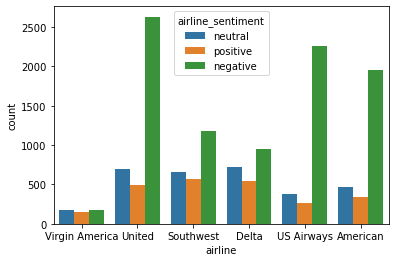

In [3]:
sns.countplot(data=df, x="airline", hue="airline_sentiment");

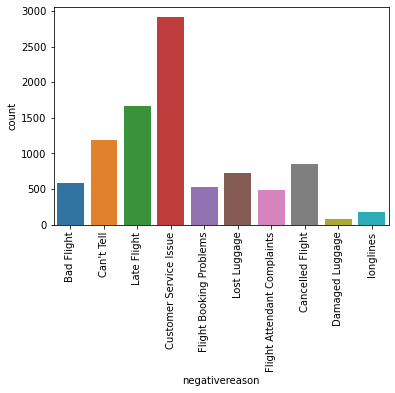

In [4]:
sns.countplot(data=df, x="negativereason")
plt.xticks(rotation=90);

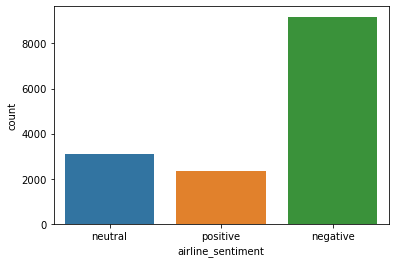

In [5]:
sns.countplot(data=df, x="airline_sentiment");

In [6]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Cleaning Data and Removing Rare Words

In [7]:
df2 = df.copy()

In [8]:
df2["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [9]:
df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))

<ipython-input-9-2306e9fc09c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))


,0
0,What said.
1,plus you've added commercials to the experien...
2,I didn't today... Must mean I need to take an...
3,"it's really aggressive to blast obnoxious ""en..."
4,and it's a really big bad thing about it
...,...
14635,thank you we got on a different flight to Chi...
14636,leaving over 20 minutes Late Flight. No warni...
14637,Please bring American Airlines to #BlackBerry10
14638,"you have my money, you change my flight, and ..."


In [10]:
df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))
df2["text"]

<ipython-input-10-7958d95ae157>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))


0                                              What  said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to Chi...
14636     leaving over 20 minutes Late Flight. No warni...
14637      Please bring American Airlines to #BlackBerry10
14638     you have my money, you change my flight, and ...
14639     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 14640, dtype: object

In [11]:
" ".join(df2["text"]).split()

['What',
 'said.',
 'plus',
 "you've",
 'added',
 'commercials',
 'to',
 'the',
 'experience...',
 'tacky.',
 'I',
 "didn't",
 'today...',
 'Must',
 'mean',
 'I',
 'need',
 'to',
 'take',
 'another',
 'trip!',
 "it's",
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 '"entertainment"',
 'in',
 'your',
 "guests'",
 'faces',
 '&amp;',
 'they',
 'have',
 'little',
 'recourse',
 'and',
 "it's",
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 '$30',
 'a',
 'flight',
 'for',
 'seats',
 'that',
 "didn't",
 'have',
 'this',
 'playing.',
 "it's",
 'really',
 'the',
 'only',
 'bad',
 'thing',
 'about',
 'flying',
 'VA',
 'yes,',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'VX',
 'this',
 '“ear',
 'worm”',
 'won’t',
 'go',
 'away',
 ':)',
 'Really',
 'missed',
 'a',
 'prime',
 'opportunity',
 'for',
 'Men',
 'Without',
 'Hats',
 'parody,',
 'there.',
 'https://t.co/mWpG7grEZP',
 'Well,',
 'I',
 "didn't…but",
 'NOW',
 'I',
 'DO!',
 ':-D',
 'it

In [12]:
pd.Series(" ".join(df2["text"]).split()).value_counts()

to           8535
the          5782
I            5054
a            4359
for          3921
             ... 
deplaned.       1
1219.           1
gosh!           1
used?           1
Muchas          1
Length: 29092, dtype: int64

In [13]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

to           8535
the          5782
I            5054
a            4359
for          3921
             ... 
deplaned.       1
1219.           1
gosh!           1
used?           1
Muchas          1
Length: 29092, dtype: int64

In [14]:
rare_words[rare_words < 2]

Customer,,,it's         1
#$10voucherwhatajoke    1
frustrated!!!           1
trip?!                  1
f@$%ing                 1
                       ..
deplaned.               1
1219.                   1
gosh!                   1
used?                   1
Muchas                  1
Length: 19032, dtype: int64

In [15]:
rare_words = rare_words[rare_words < 2]

In [16]:
rare_words.index

Index(['Customer,,,it's', '#$10voucherwhatajoke', 'frustrated!!!', 'trip?!',
       'f@$%ing', 'record,', 'Painful', '8+', 'October,', 'Flightlations?',
       ...
       'Heh', 'nonperformance', 'flight..never', 'available.Your', 'You!!!',
       'deplaned.', '1219.', 'gosh!', 'used?', 'Muchas'],
      dtype='object', length=19032)

In [17]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()
# Bir defa kullanılan kelimeleri 

0                                           What said.
1                 plus you've added commercials to the
2    I didn't today... Must mean I need to take ano...
3    it's really aggressive to blast obnoxious in y...
4             and it's a really big bad thing about it
Name: text, dtype: object

### Cleaning Data

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kurubal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/kurubal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_words = stopwords.words('english')

In [21]:
def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

In [22]:
" I don't like".replace("'", "")

' I dont like'

In [23]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"]

0                                                     said
1                              plus youve added commercial
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious face amp lit...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638      money change flight dont answer suggestion make
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

### Features and Label

In [24]:
df2 = df2[["airline_sentiment", "text"]]
df2

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious face amp lit...
4,negative,really big bad thing
...,...,...
14635,positive,thank got different flight chicago
14636,negative,leaving minute late flight warning communicati...
14637,neutral,please bring american airline
14638,negative,money change flight dont answer suggestion make


In [27]:
X = df2.text
y = df2.airline_sentiment

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Vectorization

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [31]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [32]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
# Memory sıkıntısı varsa

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abused,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodated,...,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuma,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [33]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [34]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test, y_test)

### Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB for binary model

In [37]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84      1836
     neutral       0.62      0.44      0.52       620
    positive       0.71      0.68      0.70       472

    accuracy                           0.76      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.75      0.76      0.75      2928



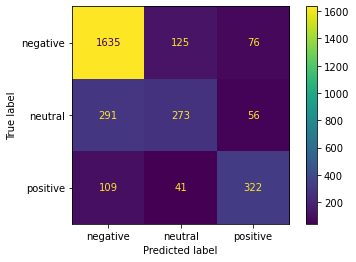

In [38]:
print("NB MODEL")
eval(nb, X_test_count)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1836
     neutral       0.60      0.56      0.58       620
    positive       0.72      0.69      0.70       472

    accuracy                           0.77      2928
   macro avg       0.72      0.71      0.71      2928
weighted avg       0.77      0.77      0.77      2928



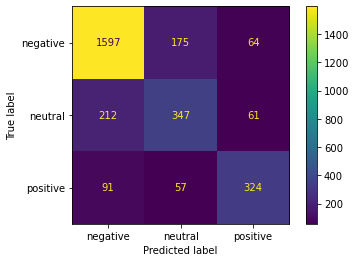

In [40]:
print("LOG MODEL")
eval(log, X_test_count)

### SVM

In [41]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVM MODEL
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1836
     neutral       0.60      0.54      0.57       620
    positive       0.71      0.70      0.71       472

    accuracy                           0.78      2928
   macro avg       0.72      0.70      0.71      2928
weighted avg       0.77      0.78      0.77      2928



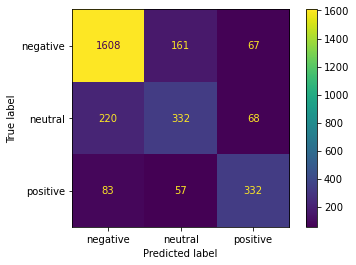

In [42]:
print("SVM MODEL")
eval(svc, X_test_count)

### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=8)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.82      0.50      0.62      1836
     neutral       0.31      0.71      0.43       620
    positive       0.64      0.52      0.58       472

    accuracy                           0.55      2928
   macro avg       0.59      0.58      0.54      2928
weighted avg       0.69      0.55      0.57      2928



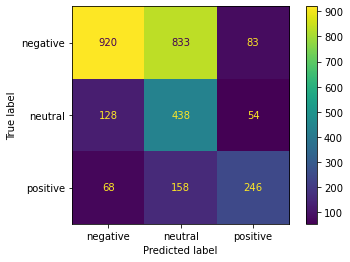

In [44]:
print("KNN MODEL")
eval(knn, X_test_count)

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84      1836
     neutral       0.58      0.48      0.53       620
    positive       0.68      0.64      0.66       472

    accuracy                           0.75      2928
   macro avg       0.69      0.66      0.68      2928
weighted avg       0.74      0.75      0.75      2928



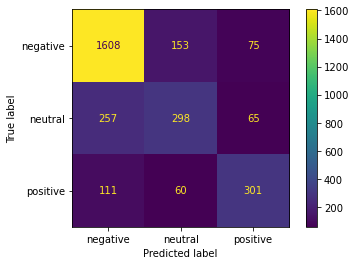

In [46]:
print("RF MODEL")
eval(rf, X_test_count)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.82      0.86      0.84      1836
     neutral       0.58      0.50      0.54       620
    positive       0.65      0.65      0.65       472

    accuracy                           0.75      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928



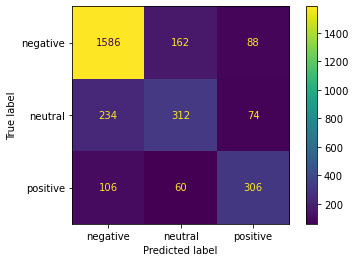

In [48]:
print("RF MODEL BALANCED")
eval(rf, X_test_count)

### Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

ADA MODEL
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      1836
     neutral       0.55      0.56      0.55       620
    positive       0.68      0.64      0.66       472

    accuracy                           0.75      2928
   macro avg       0.69      0.68      0.68      2928
weighted avg       0.75      0.75      0.75      2928



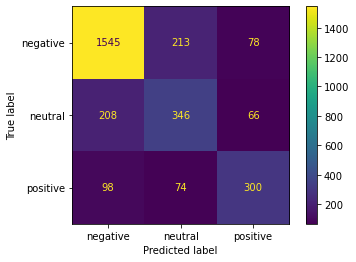

In [50]:
print("ADA MODEL")
eval(ada, X_test_count)

### TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [53]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32202387, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abused,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodated,...,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuma,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.344392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

### Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.76      0.95      0.85      1836
     neutral       0.68      0.33      0.44       620
    positive       0.78      0.59      0.67       472

    accuracy                           0.76      2928
   macro avg       0.74      0.62      0.65      2928
weighted avg       0.75      0.76      0.73      2928



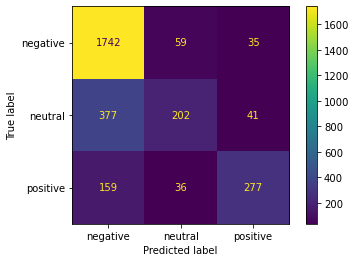

In [59]:
print("NB MODEL")
eval(nb, X_test_count)

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      1836
     neutral       0.69      0.39      0.50       620
    positive       0.65      0.73      0.69       472

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.68      2928
weighted avg       0.76      0.77      0.75      2928



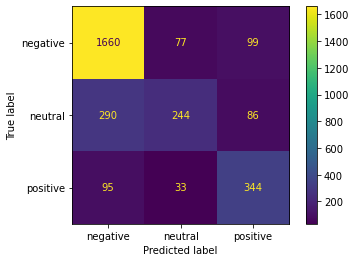

In [60]:
print("LOG MODEL")
eval(log, X_test_count)

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1836
     neutral       0.63      0.47      0.54       620
    positive       0.57      0.78      0.66       472

    accuracy                           0.76      2928
   macro avg       0.69      0.70      0.68      2928
weighted avg       0.76      0.76      0.75      2928



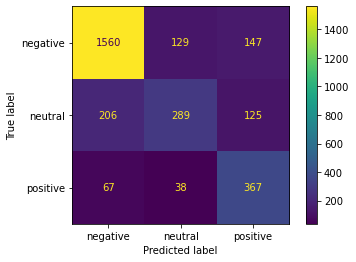

In [62]:
print("LOG MODEL BALANCED")
eval(log, X_test_count)

### SVM

In [63]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)
# Vectorizer kelimeleri öklid e göre transform ettiği için 

LinearSVC()

SVM MODEL
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1836
     neutral       0.69      0.37      0.48       620
    positive       0.64      0.76      0.69       472

    accuracy                           0.77      2928
   macro avg       0.71      0.68      0.68      2928
weighted avg       0.76      0.77      0.75      2928



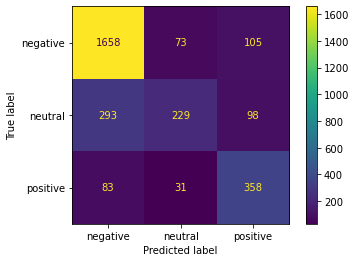

In [64]:
print("SVM MODEL")
eval(svc, X_test_count)

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier()

KNN MODEL
              precision    recall  f1-score   support

    negative       0.79      0.70      0.74      1836
     neutral       0.36      0.52      0.42       620
    positive       0.63      0.57      0.60       472

    accuracy                           0.64      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.67      0.64      0.65      2928



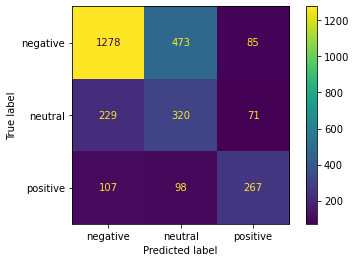

In [66]:
print("KNN MODEL")
eval(knn, X_test_count)

### RandomForest

In [67]:
rf = RandomForestClassifier(1000, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.84      0.77      0.80      1836
     neutral       0.46      0.58      0.51       620
    positive       0.65      0.65      0.65       472

    accuracy                           0.71      2928
   macro avg       0.65      0.67      0.65      2928
weighted avg       0.73      0.71      0.72      2928



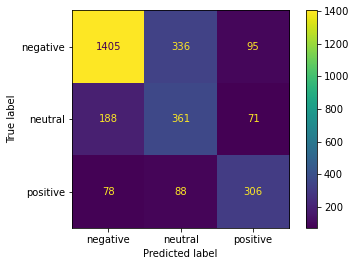

In [68]:
print("RF MODEL")
eval(rf, X_test_count)

In [ ]:
rf = RandomForestClassifier(1000, random_state = 42, n_jobs = -1, class_weight=)
rf.fit(X_train_tf_idf, y_train)

### Ada Boost

### Cross Val

### For New Tweets, Prediction With Pipeline


## WordCloud - Repetition of Words

### Collect Words

### Create Word Cloud

### Counting words